In [9]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns



In [10]:
# Load Dataset (Using Iris Dataset)
iris = load_iris()
X = iris.data
y = iris.target
# Feature and Target Names
feature_names = iris.feature_names
target_names = iris.target_names
# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].apply(lambda i: target_names[i])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
# Split Dataset into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

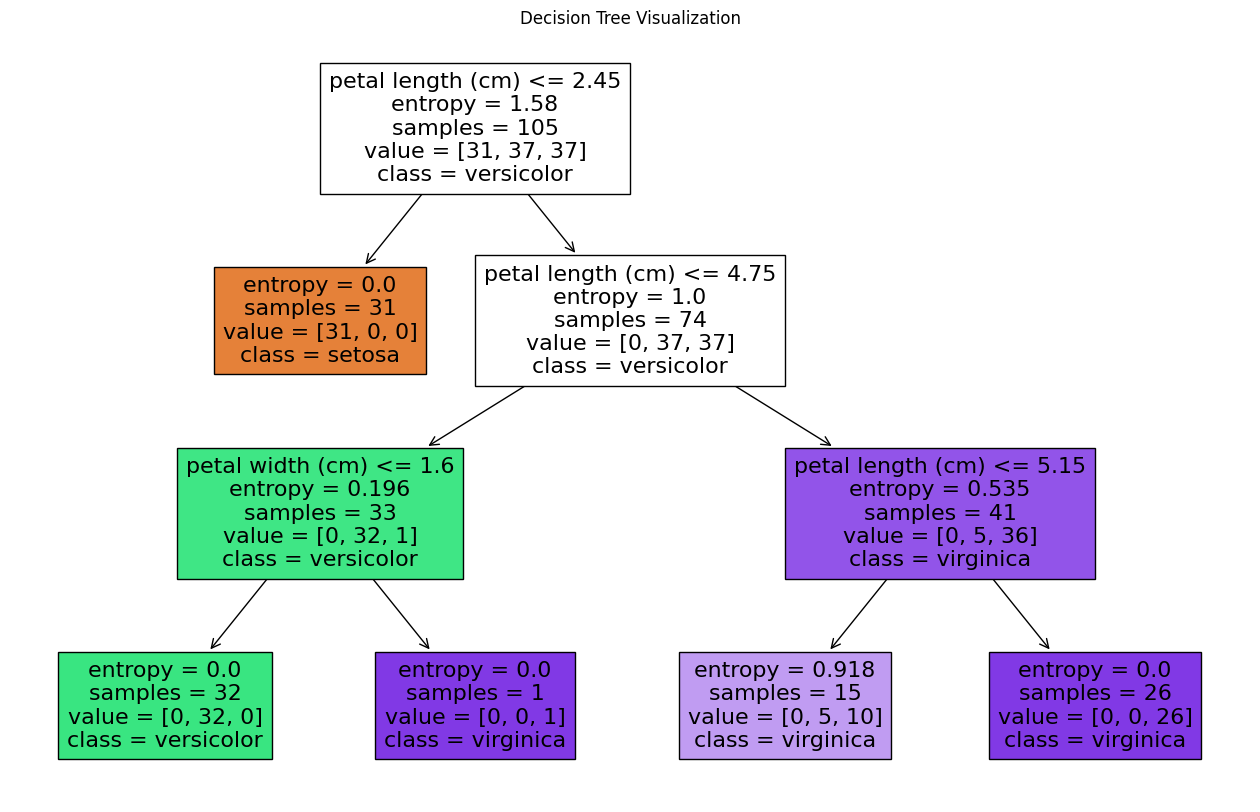

In [13]:
# Visualize the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=target_names)
plt.title("Decision Tree Visualization")
plt.show()



Accuracy: 0.9777777777777777


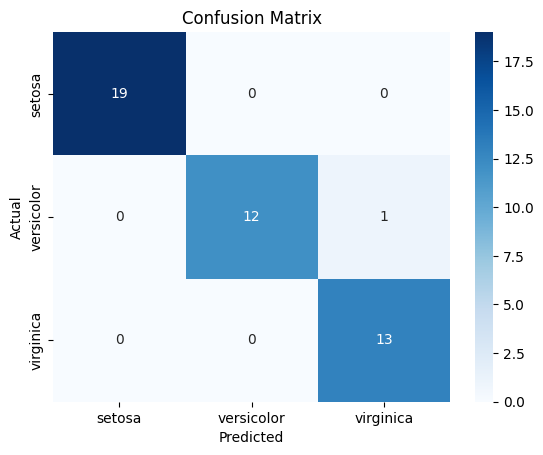

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [14]:
# Predict and Evaluate
y_pred = clf.predict(X_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
